# Planet Amazon Image Classification

The labels can broadly be broken into three groups: atmospheric conditions, common land cover/land use phenomena, and rare land cover/land use phenomena. Each chip will have one and potentially more than one atmospheric label and zero or more common and rare labels.
The common labels in this data set are rainforest, agriculture, rivers, towns/cities, and roads. The overwhelming majority of the data set is labeled as "primary"

## Importing the Data

In [1]:
#import modules
import numpy as np 
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define files and directories
os.chdir('C:/Users/isado/Documents/SpringBoard/Capstone2/')
         
# Create DataFrame with training labels
train_labels = pd.read_csv('./train_classes.csv')


In [2]:
##Extract unique labels
labels = []

for tags in train_labels.tags.values:
    label = tags.split(' ')
    for subitem in label:
        if subitem not in labels:
            labels.append(subitem)

#Create dummy variables
for label in labels:
    train_labels[label] = train_labels['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
    
train_labels

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40475,train_40475,cloudy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40476,train_40476,agriculture clear primary,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40477,train_40477,agriculture clear primary road,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [3]:
#Inspecting training labels
train_labels.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [4]:
#Extract unique labels
labels = []

for tags in train_labels.tags.values:
    label = tags.split(' ')
    for subitem in label:
        if subitem not in labels:
            labels.append(subitem)
print('Possible labels:\n', labels)

Possible labels:
 ['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


In [5]:
for label in labels:
    train_labels[label] = train_labels['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
    
train_labels   

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40475,train_40475,cloudy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40476,train_40476,agriculture clear primary,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40477,train_40477,agriculture clear primary road,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## Exploring the Data

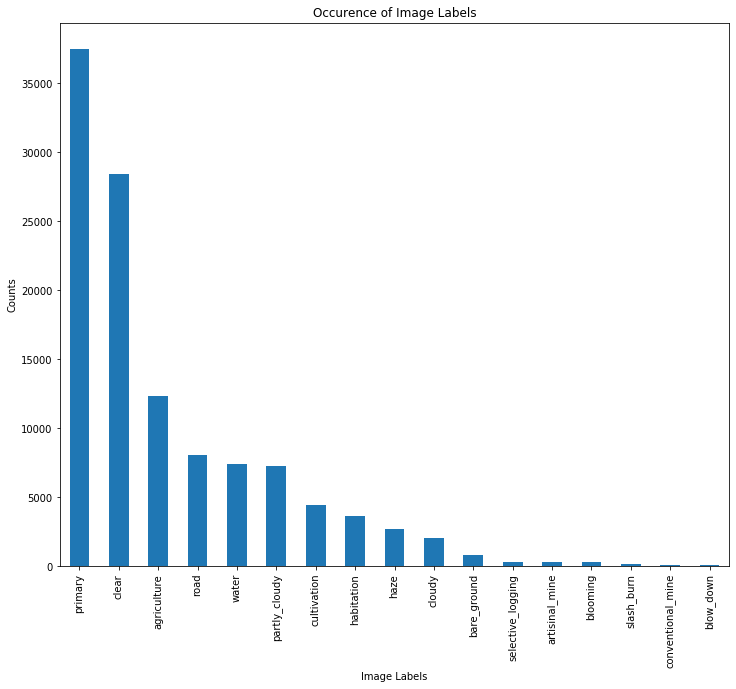

In [6]:
#Examing occurence of labels:
fig = train_labels[labels].sum().sort_values(ascending=False).plot.bar(figsize=(12,10))
fig.set_ylabel('Counts')
fig.set_xlabel('Image Labels')
fig.set_title('Occurence of Image Labels');

In [7]:
#Getting exact counts
train_labels[labels].sum()

haze                  2697
primary              37513
agriculture          12315
clear                28431
water                 7411
habitation            3660
road                  8071
cultivation           4477
slash_burn             209
cloudy                2089
partly_cloudy         7261
conventional_mine      100
bare_ground            862
artisinal_mine         339
blooming               332
selective_logging      340
blow_down               98
dtype: int64

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,0,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,0,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,0,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,0,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,0,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,0,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,0,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,0,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,0,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


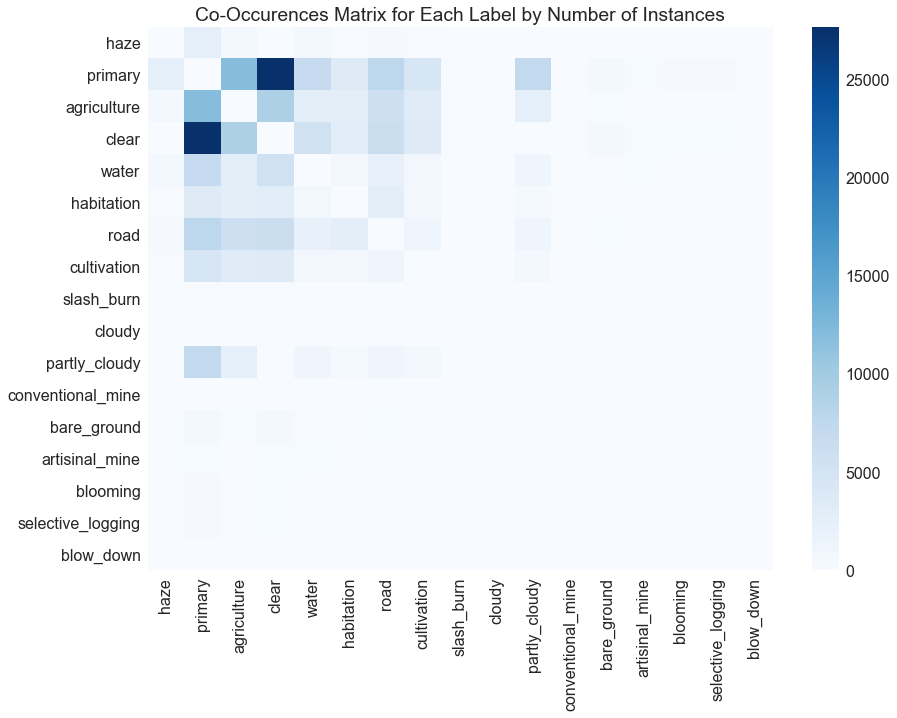

In [8]:
pd.set_option("display.max_rows", 26, "display.max_columns", None)
#Examining co-occurence of labels:

def co_occurence(labels):
    #occurences matrix
    oc_matrix = train_labels[labels]
    
    #co-occurrences matrix
    co_oc = oc_matrix.T.dot(oc_matrix)
    co_oc.values[[np.arange(co_oc.shape[0])]*2] = 0
    
    plt.figure(figsize=(14,10))
    sns.set(font_scale=1.6)
    sns.heatmap(co_oc, cmap ="Blues")
    plt.title('Co-Occurences Matrix for Each Label by Number of Instances')
    
    return co_oc

co_occurence(labels)

## Inspecting images

Raw images are 16-bit (from 0 to 65535), and contain red, green, blue, and an additional Near infrared (NIR) channel for the .tif files.

(256, 256, 3)


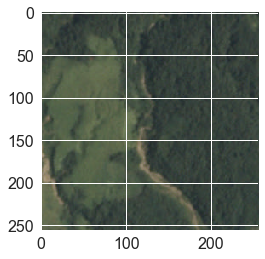

In [9]:
from IPython.display import display
from skimage import io


#Write function to get a specific image

def load_image(file_name, type='jpg'):
    img_path = ('./train-{}/{}.{}').format(type,file_name,type)
    img = io.imread(img_path)
    return img

image = load_image('train_1')
plt.imshow(image)
print(image.shape)

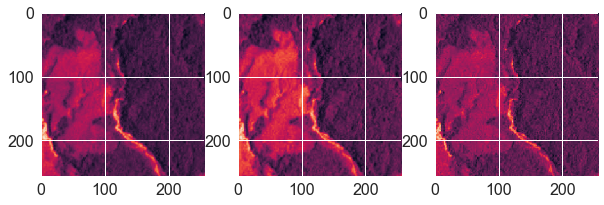

In [10]:
#Breaking down color channels
def extract_rgb(image):
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    return r, g, b

r, g, b = extract_rgb(image)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

#Display all 3 channels
for ax, fig in zip(axs,[r,g,b]):
    ax.imshow(fig)
    ax.grid(True)

## Find average RGB values for each category and each image

In [11]:
####### The code below was used to generate the file 'mean_RGB.csv'.###############################
####### Due to running time, the results are stored and directly read from a csv file ######################

image_names_dict={}

for label in labels:
    #gets the image names in the training set for each label
    image_names = train_labels[train_labels[label] == 1]['image_name']
    image_names_dict[label] = list(image_names.values)

# mean_rgb_label_dict = {} # stores mean RGB value per label type

# for label, image_names in image_names_dict.items():
#     reds = []
#     greens = []
#     blues = []
    
#     for image in image_names:
#         r, g, b = extract_rgb(load_image(image))
#         #section below calculates average R, G, B values for each image
#         red_mean = np.mean(r)
#         green_mean = np.mean(g)
#         blue_mean = np.mean(b)

#         reds.append(red_mean)
#         greens.append(green_mean)
#         blues.append(blue_mean)

#     #this section calculates overall R,G,B mean values for all images with the label    
#     red_mean = np.mean(reds)
#     green_mean = np.mean(greens)
#     blue_mean = np.mean(blues)
        
#     mean_rgb_label_dict[label]={'red':red_mean, 'green':green_mean, 'blue': blue_mean}
    
#     print(label)
    
# #print(mean_rgb_label_dict)

In [12]:
#mean_rgb_label_df = pd.DataFrame.from_dict(mean_rgb_label_dict).T
#mean_rgb_label_df.to_csv('mean_RGB.csv')

In [13]:
mean_rgb_df = pd.read_csv('mean_RGB.csv', index_col=0)
mean_rgb_df['intensity'] = mean_rgb_df.red + mean_rgb_df.green + mean_rgb_df.blue
mean_rgb_df.sort_values("intensity", axis = 0, ascending = False, inplace = True)
mean_rgb_df = mean_rgb_df.iloc[:,0:3]
mean_rgb_df

,red,green,blue
cloudy,158.973362,160.025921,149.450716
haze,117.525876,123.862584,113.743337
artisinal_mine,116.440484,110.586303,88.024968
conventional_mine,114.068875,103.044184,87.033040
partly_cloudy,90.953975,97.686665,87.032076
road,95.612493,97.422968,82.537842
habitation,94.522138,95.868050,80.025285
agriculture,91.662682,95.120077,81.276080
water,90.529311,94.506187,82.300292
bare_ground,96.866544,92.931536,74.956128


In [14]:
# This section calculates average RGB values per image
####### Due to running time, the results are stored and directly read from a csv file ######################

# mean_rgb_images_dict = {} #stores mean RGB values per image

# for image in np.array(train_labels['image_name']):
#     r, g, b = extract_rgb(load_image(image))
#     #section below calculates average R, G, B values for each image
#     red_mean = np.mean(r)
#     green_mean = np.mean(g)
#     blue_mean = np.mean(b)

#     mean_rgb_images_dict[image]={'R':red_mean, 'G':green_mean, 'B': blue_mean}

In [15]:
# mean_rgb_images_df = pd.DataFrame.from_dict(mean_rgb_images_dict).T
# mean_rgb_images_df.to_csv('mean_RGB_images.csv')

In [16]:
mean_rgb_images_df = pd.read_csv('mean_RGB_images.csv', index_col=0)

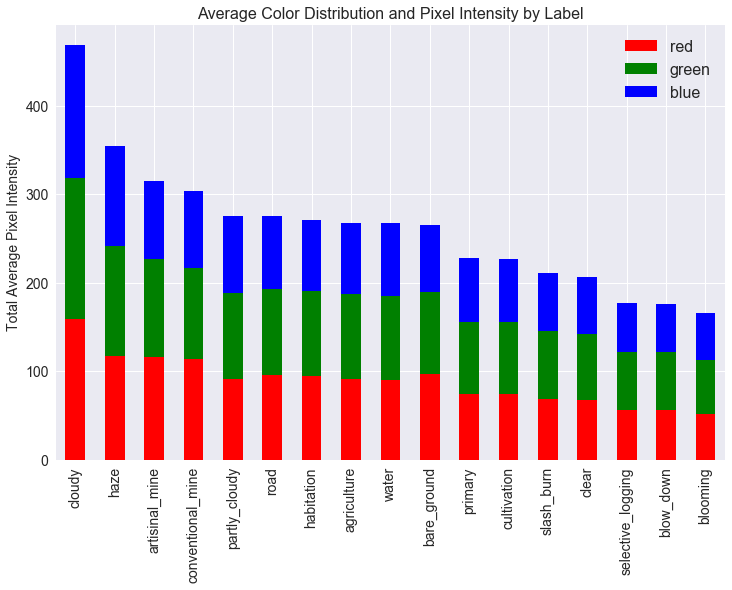

In [17]:
mean_rgb_df.plot(kind='bar', stacked=True, figsize=(12,8), color=['r','g','b'], fontsize=14)
plt.title('Average Color Distribution and Pixel Intensity by Label',fontsize=16)
plt.ylabel('Total Average Pixel Intensity', fontsize=14);

## Generating an average image for each category (pixel by pixel)

In [18]:
image_size = (256, 256, 3)
avg_image_dict = {}


for label, image_names in image_names_dict.items():
    # Create a numpy array of floats to store the average
    avg_image=np.zeros(image_size,np.float)

    for image in image_names:
        image_array = load_image(image)
        avg_image = avg_image + image_array
    
    num_images = len(image_names)
    avg_image_dict[label] = avg_image/num_images
    print('Processed label: ', label)

Processed label:  haze
Processed label:  primary
Processed label:  agriculture
Processed label:  clear
Processed label:  water
Processed label:  habitation
Processed label:  road
Processed label:  cultivation
Processed label:  slash_burn
Processed label:  cloudy
Processed label:  partly_cloudy
Processed label:  conventional_mine
Processed label:  bare_ground
Processed label:  artisinal_mine
Processed label:  blooming
Processed label:  selective_logging
Processed label:  blow_down


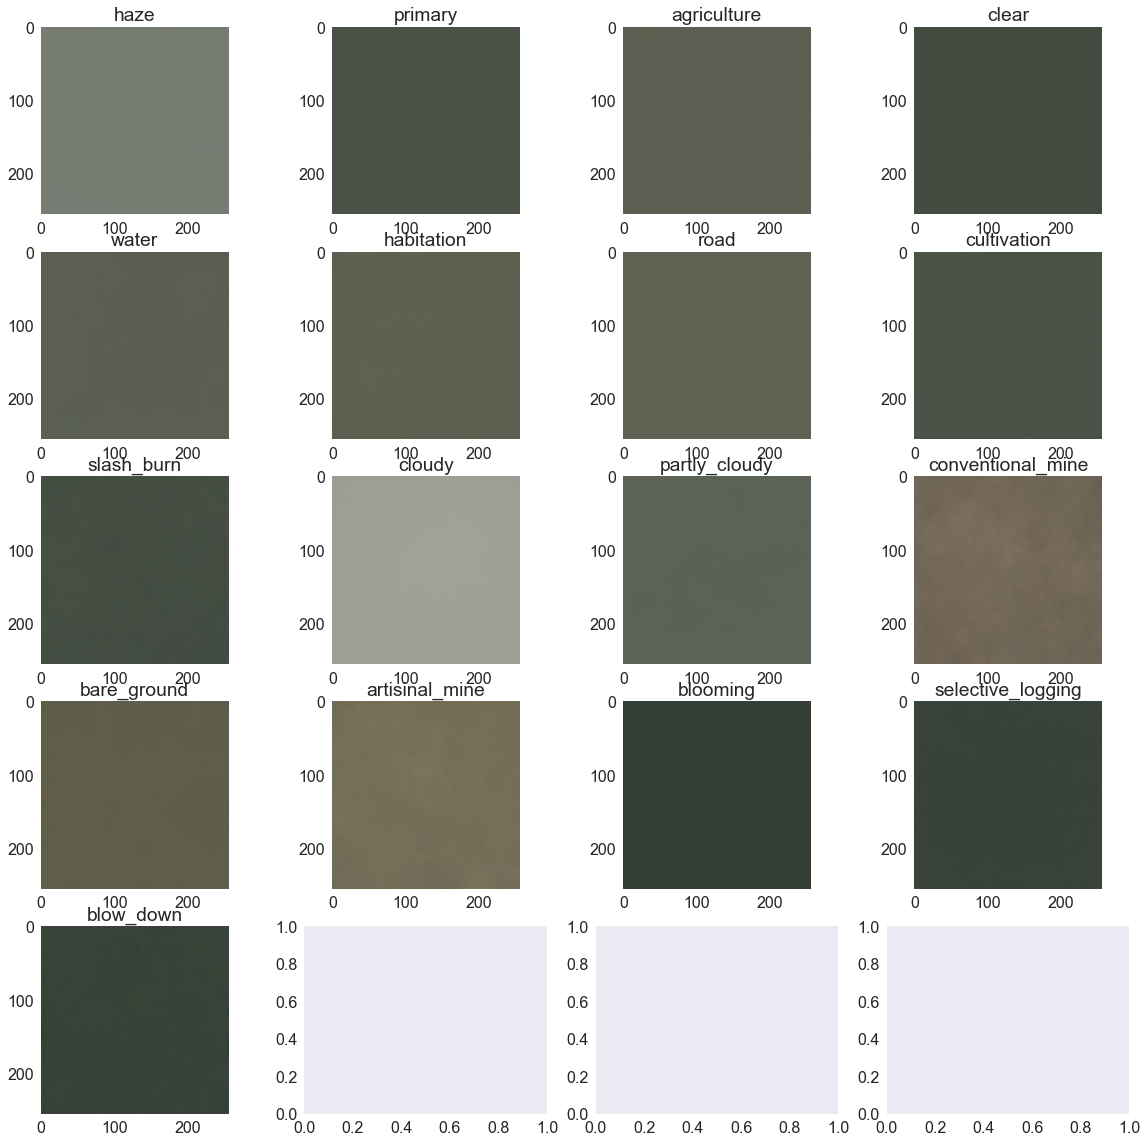

In [31]:
import matplotlib.pyplot as plt
import math

nrow=5
ncol=4


plt.rcParams["axes.grid"] = False
_, ax = plt.subplots(nrow, ncol, figsize=(20, 20))
i = 0

for label, avg_image in avg_image_dict.items():
    #Display image and corresponding label
    avg_image = np.array(np.round(avg_image),dtype=np.uint8)
    row = math.floor(i/ncol)
    col = i - math.floor(i/ncol)*ncol
    ax[row,col].imshow(avg_image)
    ax[row,col].set_title(label)
    i += 1
    plt.imsave('avg_image_{}.jpg'.format(label),avg_image)
    
plt.show()    